In [216]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import re

pd.set_option('display.max_rows', None)

In [217]:
#!ls -1 #Jupyter Notebook
!dir #VSCODE


 O volume na unidade C � Windows
 O N�mero de S�rie do Volume � 0676-E265

 Pasta de c:\Users\henri\OneDrive\Documents\FIAP\3exemplo_dados_vendas_eletrodomesticos



Arquivo n�o encontrado


In [218]:
df_original = pd.read_csv('exemplo_dados_vendas_eletrodomesticos.csv')
df = df_original

In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4581 entries, 0 to 4580
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cd_produto    4581 non-null   int64  
 1   qtde          4581 non-null   int64  
 2   nota          4581 non-null   int64  
 3   preco_liq     4581 non-null   float64
 4   preco_ipi     4581 non-null   float64
 5   preco_icms    4581 non-null   float64
 6   p_ipi         4581 non-null   int64  
 7   p_icm         4581 non-null   int64  
 8   nm_produto    4581 non-null   object 
 9   cd_cliente    4581 non-null   float64
 10  nm_cliente    4581 non-null   object 
 11  cidade        4581 non-null   object 
 12  uf            4581 non-null   object 
 13  cd_vendedor   4581 non-null   int64  
 14  nm_vendedor   4581 non-null   object 
 15  cd_familia    4581 non-null   int64  
 16  nm_familia    4581 non-null   object 
 17  cd_grupo      4581 non-null   int64  
 18  nm_grupo      4581 non-null 

### EDA

In [220]:
# Calculando o lucro bruto por venda
#df['lucro_por_venda'] = df['valor'] - (df['preco_liq'] + df['preco_ipi'] + df['preco_icms'])
#ERROR print(df[['lucro', 'lucro_por_venda']])

#df['nota'].value_counts().sum()

print(df['nm_operacao'].value_counts().sum())
print("produtos vendidos:", df[df['nm_operacao'] == 'VENDAS']['nota'].value_counts().sum())
itens_por_pedido = df.groupby('nota')['cd_produto'].count()
print("Número de vendas:", itens_por_pedido.value_counts().sum())

4581
produtos vendidos: 2433
Número de vendas: 2911


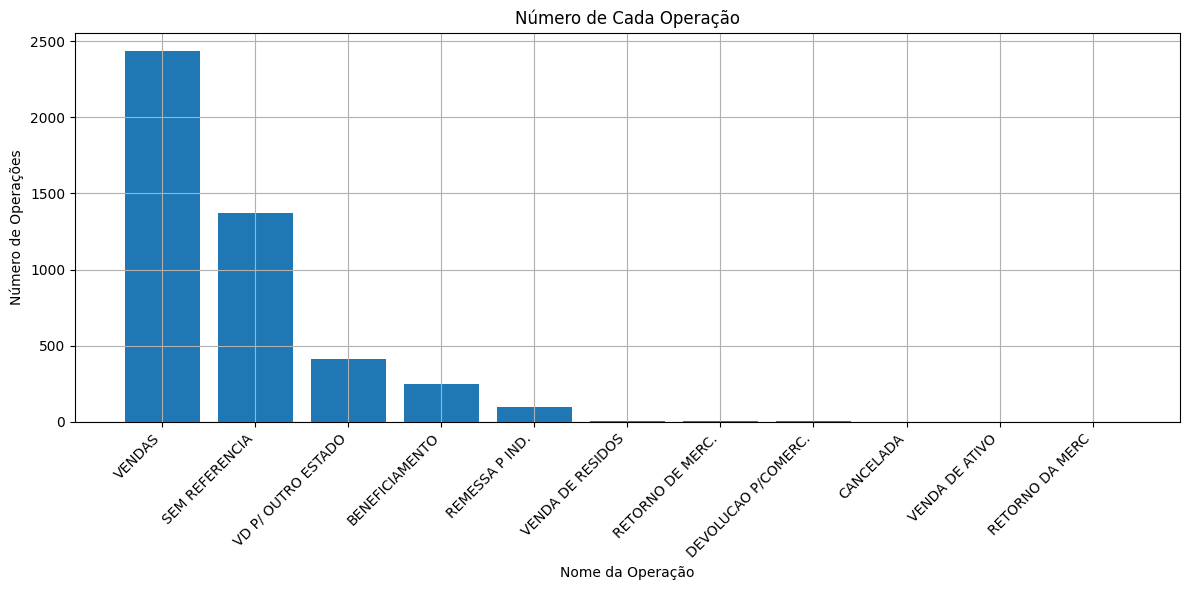

nm_operacao
VENDAS                 2433
SEM REFERENCIA         1373
VD P/ OUTRO ESTADO      414
BENEFICIAMENTO          245
REMESSA P IND.           99
VENDA DE RESIDOS          6
RETORNO DE MERC.          5
DEVOLUCAO P/COMERC.       3
CANCELADA                 1
VENDA DE ATIVO            1
RETORNO DA MERC           1
Name: count, dtype: int64


In [221]:
aa = df['nm_operacao'].value_counts()
plt.figure(figsize=(12, 6))

plt.bar(aa.index, aa.values)
plt.xlabel("Nome da Operação")
plt.ylabel("Número de Operações")
plt.title('Número de Cada Operação')
plt.grid(alpha=1)
plt.xticks(rotation=45, ha="right")  # Rotaciona os rótulos em 45 graus e alinha à direita
plt.tight_layout()  # Ajusta o layout para evitar sobreposição

plt.show()
print(df['nm_operacao'].value_counts())

In [222]:
print(df['cd_operacao'].value_counts())

cd_operacao
5.102    2434
9.999    1373
6.102     414
5.901     245
5.924      99
5.949       6
5.903       5
5.202       3
0.000       1
5.913       1
Name: count, dtype: int64


### 'cd_operacao' e 'nm_operacao' representam a mesma coisa

cada tipo de operação com base nos nomes das operações:

VENDAS: Indica uma venda padrão, ou seja, um produto foi vendido ao cliente final dentro do mesmo estado. Essa operação é a mais comum e representa a maioria das transações.


SEM REFERENCIA: Refere-se a uma operação sem uma classificação específica ou desconhecida. Pode envolver transações atípicas ou de natureza administrativa, onde não foi designada uma categoria exata.


VD P/ OUTRO ESTADO: "Venda para Outro Estado". Esta operação ocorre quando a venda é realizada para um cliente em um estado diferente. Geralmente, transações entre estados podem ter implicações fiscais, como alíquotas de ICMS (Imposto sobre Circulação de Mercadorias e Serviços) diferenciadas.


BENEFICIAMENTO: Refere-se a operações de beneficiamento, que envolvem o envio de mercadorias para serem melhoradas, processadas ou tratadas antes de serem vendidas ou devolvidas ao inventário.


REMESSA P IND.: "Remessa para Industrialização". Significa que o produto é enviado a uma empresa de industrialização, para receber processamento adicional antes de ser vendido ou devolvido.


VENDA DE RESÍDUOS: Indica a venda de resíduos ou sobras de materiais, provavelmente provenientes de processos de fabricação ou industrialização.


RETORNO DE MERCADORIA: Refere-se a produtos que foram enviados para fora da empresa (por exemplo, para beneficiamento ou industrialização) e estão sendo devolvidos ao estoque.


DEVOLUÇÃO PARA COMÉRCIO: Indica uma devolução feita pelo cliente final ou por um comerciante. Pode ocorrer por vários motivos, como defeito no produto ou insatisfação do cliente.


CANCELADA: Representa uma operação de venda que foi cancelada. Isso significa que a transação foi anulada e não houve entrega do produto.


VENDA DE ATIVO: Essa operação se refere à venda de um ativo da empresa (e não de um produto destinado a clientes). Pode incluir máquinas, equipamentos, móveis, ou outros itens que fazem parte do patrimônio.


RETORNO DA MERCADORIA: Similar ao "RETORNO DE MERCADORIA", mas o nome sugere que se trata de uma devolução de produtos que retornam ao estoque após serem enviados a algum cliente ou para outro destino.

In [223]:
#Outlier de data 1907?
datas_ordenadas = df['data_pedido'].sort_values().unique()
print(datas_ordenadas)
df = df[df['data_pedido'] != '1907-01-11 00:00:00']

['1907-01-11' '2006-12-14' '2006-12-18' '2006-12-21' '2006-12-27'
 '2007-01-08' '2007-01-16' '2007-01-18' '2007-01-22' '2007-01-24'
 '2007-01-29' '2007-01-30' '2007-02-06' '2007-02-08' '2007-02-15'
 '2007-02-16' '2007-02-22' '2007-02-26' '2007-02-27' '2007-03-06'
 '2007-03-08' '2007-03-12' '2007-03-14' '2007-03-15' '2007-03-16'
 '2007-03-19' '2007-03-20' '2007-03-22' '2007-03-27' '2007-04-03'
 '2007-04-04' '2007-04-10' '2007-04-16' '2007-04-18' '2007-04-19'
 '2007-04-23' '2007-05-03' '2007-05-11' '2007-05-14' '2007-05-15'
 '2007-05-16' '2007-05-17' '2007-05-21' '2007-05-24' '2007-05-29'
 '2007-06-04' '2007-06-05' '2007-06-18' '2007-06-21' '2007-06-25'
 '2007-06-26' '2007-06-29' '2007-07-03' '2007-07-04' '2007-07-05'
 '2007-07-11' '2007-07-16' '2007-07-31' '2007-08-08' '2007-08-13'
 '2007-08-16' '2007-08-20' '2007-08-21' '2007-08-23' '2007-08-27'
 '2007-09-03' '2007-09-06' '2007-09-11' '2007-09-12' '2007-09-20'
 '2007-09-24' '2007-09-27' '2007-10-01' '2007-10-04' '2007-10-05'
 '2007-10-

In [224]:
#A coluna 'nota' é o código da compra, "nota fiscal"
#print(orders['order_id'].value_counts())
#print(orders['order_hour_of_day'].unique())
#print(df['nota'].value_counts())
#df[df['nm_familia'] == 'NETBOOK'].head()

### Modificando o df para nos aprofundarmos na análise 

In [225]:
# Função para adicionar coluna de mês e ano
def adicionar_mes_ano(df, coluna_data):
    # Verifica se a coluna de data está no formato datetime
    if not pd.api.types.is_datetime64_any_dtype(df[coluna_data]):
        df[coluna_data] = pd.to_datetime(df[coluna_data])  # Converte a coluna para o tipo datetime
    
    # Extrai o ano e o mês como uma nova coluna 'mes_ano'
    df['mes_ano'] = df[coluna_data].dt.to_period("M")
    return df

# Adicionar coluna de mês e ano
df = adicionar_mes_ano(df, 'data_pedido')

In [226]:
# Função para adicionar coluna de dia da semana
def adicionar_dia_da_semana(df, coluna_data):
    # Verifica se a coluna de data está no formato datetime
    if not pd.api.types.is_datetime64_any_dtype(df[coluna_data]):
        df[coluna_data] = pd.to_datetime(df[coluna_data])  # Converte a coluna para o tipo datetime
    
    # Cria a nova coluna 'dia_da_semana' com o nome do dia da semana
    df['dia_da_semana'] = df[coluna_data].dt.day_name()
    return df

# Adicionando a coluna de dia da semana
df = adicionar_dia_da_semana(df, 'data_pedido')

In [227]:
# Define uma lista de famílias de produtos
familias = ['IPAD', 'NETBOOK', 'SMARTFONE', 'MICRO-COMPUTADOR', 'NOTEBOOK', 'CELULAR', 'INTEGRADOS']

# Altera a coluna 'categoria_produto' para 'eletronicos' quando 'nm_familia' está na lista
df.loc[df['nm_familia'].isin(familias), 'categoria_produto'] = 'eletronicos'

# Altera a coluna 'categoria_produto' para 'linha branca' quando 'nm_familia' é 'LINHA BRANCA'
df.loc[df['nm_familia'] == 'LINHA BRANCA', 'categoria_produto'] = 'linha branca'

# Altera a coluna 'categoria_produto' para 'linha marrom' quando 'nm_familia' é 'TV' ou 'RADIOS'
df.loc[df['nm_familia'].isin(['TV', 'RADIOS']), 'categoria_produto'] = 'linha marrom'


df.loc[df['nm_familia'] == 'ELETRODOMESTICOS DE COZINHA', 'categoria_produto'] = 'eletrodomesticos'

df.loc[df['nm_familia'] == 'TELEFONE FIXO ANTIGO', 'categoria_produto'] = 'outros'

df.loc[df['nm_familia'] == 'APARELHOS DE AR', 'categoria_produto'] = 'aparelhos de ar'

# Imprime as colunas relevantes para verificar as alterações
print(df[['nm_familia', 'categoria_produto']].head(20))
print(df[['nm_familia', 'categoria_produto']].value_counts())
df['categoria_produto'].value_counts()

          nm_familia categoria_produto
0       LINHA BRANCA      linha branca
1   MICRO-COMPUTADOR       eletronicos
2       LINHA BRANCA      linha branca
3   MICRO-COMPUTADOR       eletronicos
4         INTEGRADOS       eletronicos
5            NETBOOK       eletronicos
6             RADIOS      linha marrom
7   MICRO-COMPUTADOR       eletronicos
8         INTEGRADOS       eletronicos
9          SMARTFONE       eletronicos
10      LINHA BRANCA      linha branca
11        INTEGRADOS       eletronicos
12           NETBOOK       eletronicos
13              IPAD       eletronicos
14           NETBOOK       eletronicos
15      LINHA BRANCA      linha branca
16           NETBOOK       eletronicos
17                TV      linha marrom
18           NETBOOK       eletronicos
19           NETBOOK       eletronicos
nm_familia                   categoria_produto
ELETRODOMESTICOS DE COZINHA  eletrodomesticos     791
NETBOOK                      eletronicos          703
IPAD                      

categoria_produto
eletronicos         2394
eletrodomesticos     791
linha marrom         510
aparelhos de ar      382
linha branca         306
outros               198
Name: count, dtype: int64

In [228]:
# Adiciona coluna com a data da primeira compra para cada cliente
df['data_primeira_compra'] = df.groupby('cd_cliente')['data_pedido'].transform('min')

# Adiciona coluna com a data da última compra para cada cliente
df['data_ultima_compra'] = df.groupby('cd_cliente')['data_pedido'].transform('max')

# Calcula os dias desde a primeira compra
df['dias_desde_primeira_compra'] = (df['data_pedido'] - df['data_primeira_compra']).dt.days

# Calcula os dias desde a última compra
df['dias_desde_ultima_compra'] = (df['data_pedido'] - df['data_ultima_compra']).dt.days

### Não Perca!

In [229]:
#transformar em comentario, isso "filtra" faz com que somente as vendas estejam no df
dfaa = df

#df.loc[(df['lucro'] > 0) & (df['nm_operacao'] == 'SEM REFERENCIA'), 'nm_operacao'] = 'VENDAS'
#df.loc[(df['lucro'] > 0) & (df['cd_operacao'] == 5.102), 'cd_operacao'] = 9.999

"""df['nm_operacao'] = df['nm_operacao'].replace('SEM REFERENCIA', 'VENDAS')
df['cd_operacao'] = df['cd_operacao'].replace('5.102', '9.999')"""
df = df[df['nm_operacao'] == 'VENDAS']

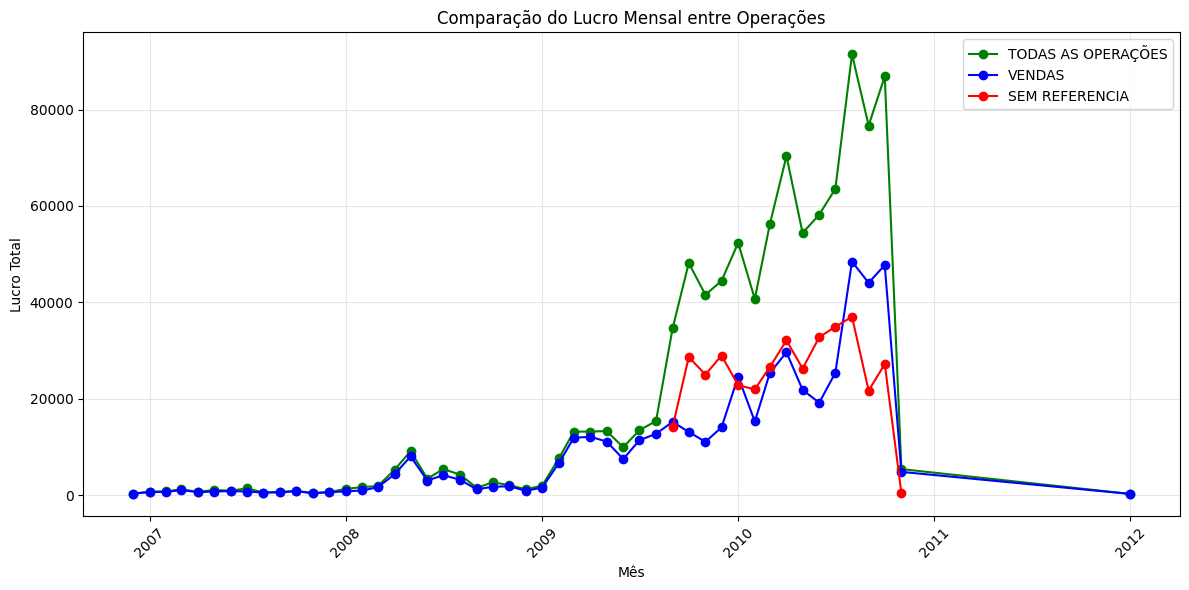

In [230]:

dfaa = dfaa[dfaa['data_pedido'] != '1907-01-11 00:00:00']

VENDAS = df
SEM_REFERENCIA = dfaa[dfaa['nm_operacao'] == 'SEM REFERENCIA']
# Calcula o lucro mensal para cada DataFrame
lucro_mensal = df.groupby('mes_ano')['lucro'].sum()
lucro_mensal.index = lucro_mensal.index.to_timestamp()

lucro_mensal_dfaa = dfaa.groupby('mes_ano')['lucro'].sum()
lucro_mensal_dfaa.index = lucro_mensal_dfaa.index.to_timestamp()

lucro_mensal_SEM_REFERENCIA = SEM_REFERENCIA.groupby('mes_ano')['lucro'].sum()
lucro_mensal_SEM_REFERENCIA.index = lucro_mensal_SEM_REFERENCIA.index.to_timestamp()

# Cria o gráfico com as duas linhas de lucro mensal
plt.figure(figsize=(12, 6))

# Ajuste de índices e valores de cada DataFrame
plt.plot(lucro_mensal_dfaa.index, lucro_mensal_dfaa.values, marker='o', linestyle='-', color='g', label="TODAS AS OPERAÇÕES")
plt.plot(lucro_mensal.index, lucro_mensal.values, marker='o', linestyle='-', color='b', label="VENDAS")
plt.plot(lucro_mensal_SEM_REFERENCIA.index, lucro_mensal_SEM_REFERENCIA.values, marker='o', linestyle='-', color='r', label="SEM REFERENCIA")

# Configurações dos eixos e título
plt.xlabel("Mês")
plt.ylabel("Lucro Total")
plt.title("Comparação do Lucro Mensal entre Operações")
plt.legend()  # Adiciona a legenda para distinguir as duas séries
plt.grid(alpha=0.3)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

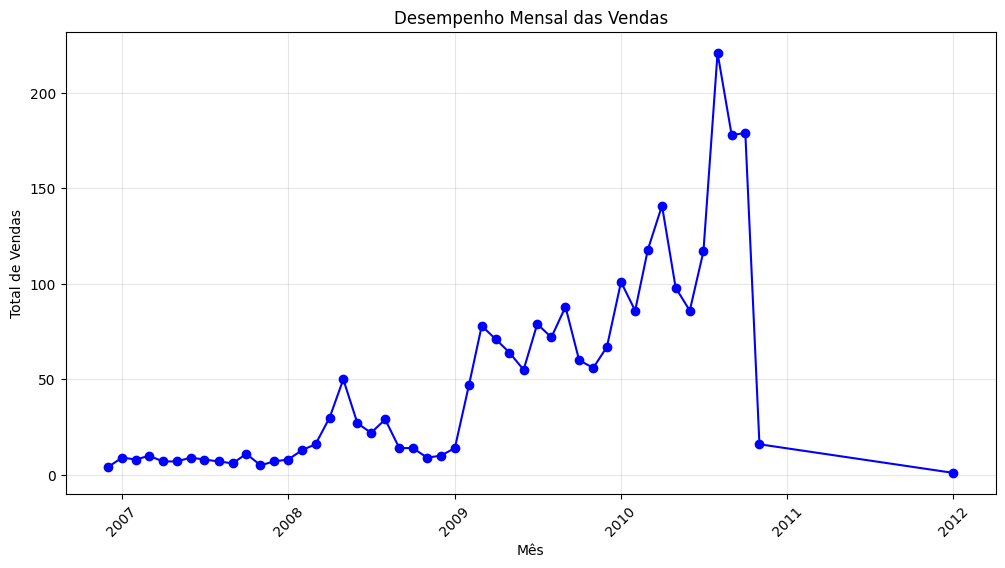

In [231]:
# Agrupar por 'mes_ano' e calcular o total de vendas para cada mês
#vendas_mensais = df.groupby('mes_ano')['valor'].sum()
vendas_mensais = df.groupby('mes_ano')['nota'].count()

# Converter o índice para datetime para facilitar a plotagem
vendas_mensais.index = vendas_mensais.index.to_timestamp()

# Plotando o desempenho das vendas ao longo dos meses
plt.figure(figsize=(12, 6))
plt.plot(vendas_mensais.index, vendas_mensais.values, marker='o', linestyle='-', color='b')
plt.xlabel("Mês")
plt.ylabel("Total de Vendas")
plt.title("Desempenho Mensal das Vendas")
plt.grid(alpha=0.3)
plt.xticks(rotation=45)

plt.show()

In [232]:
dfaa['nm_produto'].value_counts()

nm_produto
MOEDORA ARNO Serie 03                       645
MEDIA LEMBRANCA MICROLIXO Serie 84          354
VENTOSO VENTILVA Serie 35                   228
MUITA LEMBRANCA GRAMPOLA Serie 85           162
CELULAR TECLADO Motorola Serie 34           151
ALGUMA LEMBRANCA ITAUTEC Serie 85           121
PRETO DO BISAVO TELESP Serie 35             116
ATE 50 LITROS PRADARIA Serie 78              90
IMAGEM AVANCADA LG Serie 56                  81
CELULAR COM MP3+MP3+MP3+TV Nokia Serie 8     73
MEDIA LEMBRANCA SISNE Serie 85               72
ATE 20 LITROS BRASTEMP Serie 35              71
MEDIA LEMBRANCA VIVALDA Serie 85             67
COM RELOGIO CONSORTE FUNCA Serie 85          64
MUITA LEMBRANCA IMPERION Serie 78            61
VAGA LEMBRANCA HP Serie 35                   54
MOEDORA ARNO Serie 35                        53
IMAGEM NORMAL MONTVELHO Serie 99             51
MUITA LEMBRANCA CELL LIBERTY Serie 84        51
ATE 50 LITROS PRADARIA Serie 92              44
MEDIA LEMBRANCA DELL Serie 99

In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2433 entries, 0 to 4578
Data columns (total 38 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   cd_produto                  2433 non-null   int64         
 1   qtde                        2433 non-null   int64         
 2   nota                        2433 non-null   int64         
 3   preco_liq                   2433 non-null   float64       
 4   preco_ipi                   2433 non-null   float64       
 5   preco_icms                  2433 non-null   float64       
 6   p_ipi                       2433 non-null   int64         
 7   p_icm                       2433 non-null   int64         
 8   nm_produto                  2433 non-null   object        
 9   cd_cliente                  2433 non-null   float64       
 10  nm_cliente                  2433 non-null   object        
 11  cidade                      2433 non-null   object        
 1